# **PREDICTIVE ANALYTICS - ASSIGNMENT 2**

M.Q Maffa - 217042432

Time Series Analysis of Daily Steps Data

Objectives:

1. Explore the overall trends in daily steps taken by the individual.
2. Identify any seasonality or recurring patterns in the data.
3. Forecast the time series and test the fitness of it.

Data preparation: Read Data from all csv files

In [50]:
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, message="The frame.append method is deprecated")

# List of CSV files
csv_files = [
    'Steps1.csv', 'Steps2.csv', 'Steps3.csv', 'Steps4.csv', 'Steps5.csv',
    'Steps6.csv', 'Steps7.csv', 'Steps8.csv', 'Steps9.csv', 'Steps10.csv',
    'Steps11.csv', 'Steps12.csv', 'Steps13.csv', 'Steps14.csv', 'Steps15.csv'
]

# Initialize an empty list to hold DataFrames
data_frames = []

# Loop through the list of CSV files and read them into DataFrames
for csv_file in csv_files:
    try:
        df = pd.read_csv(csv_file)
        data_frames.append(df)
    except FileNotFoundError:
        print(f"File not found: {csv_file}")

combined_data = pd.concat(data_frames, ignore_index=True)
print(combined_data.head())


          Date  Actual  Goal
0  May 31 2022       0  8000
1   Jun 1 2022       0  8000
2   Jun 2 2022       0  8000
3   Jun 3 2022    1102  8000
4   Jun 4 2022    1254  8000


Convert the date column: DD/MM/YYYY

In [51]:
import pandas as pd


combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%b %d %Y')
combined_data.set_index('Date', inplace=True)
print(combined_data.head())




            Actual  Goal
Date                    
2022-05-31       0  8000
2022-06-01       0  8000
2022-06-02       0  8000
2022-06-03    1102  8000
2022-06-04    1254  8000


Set the date as index

In [52]:
combined_data = pd.concat(data_frames, ignore_index=True)
combined_data['Date'] = pd.to_datetime(combined_data['Date'], format='%b %d %Y')

# Set the "Date" column as the index
combined_data.set_index('Date', inplace=True)

# Sort the DataFrame by the index (Date) in ascending order
combined_data.sort_index(inplace=True)
print(combined_data.head())




            Actual  Goal
Date                    
2022-05-31       0  8000
2022-06-01       0  8000
2022-06-02       0  8000
2022-06-03    1102  8000
2022-06-04    1254  8000


Handle missing values: imputation or removal

In [53]:
import numpy as np

combined_data.fillna(0, inplace=True)

# Replace zeros with NaNs in the 'Actual' column
combined_data['Actual'] = combined_data['Actual'].replace(0, np.nan)

# Fill NaNs with the next valid observation in the 'Actual' column
combined_data['Actual'] = combined_data['Actual'].fillna(method='bfill')

print(combined_data.isna().sum())
print(combined_data.head())




Actual    0
Goal      0
dtype: int64
            Actual  Goal
Date                    
2022-05-31  1102.0  8000
2022-06-01  1102.0  8000
2022-06-02  1102.0  8000
2022-06-03  1102.0  8000
2022-06-04  1254.0  8000


<ipython-input-53-447cbc63214d>:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data['Actual'] = combined_data['Actual'].fillna(method='bfill')


In [54]:
# Check if the columns 'Goal' and 'Actual' contain only numeric values
if combined_data['Goal'].apply(lambda x: isinstance(x, (int, float))).all() and \
   combined_data['Actual'].apply(lambda x: isinstance(x, (int, float))).all():
    print("Values are in a correct numeric format.")
else:
    print("Not numeric.")


Values are in a correct numeric format.


Visualize Time Series of Daily Steps

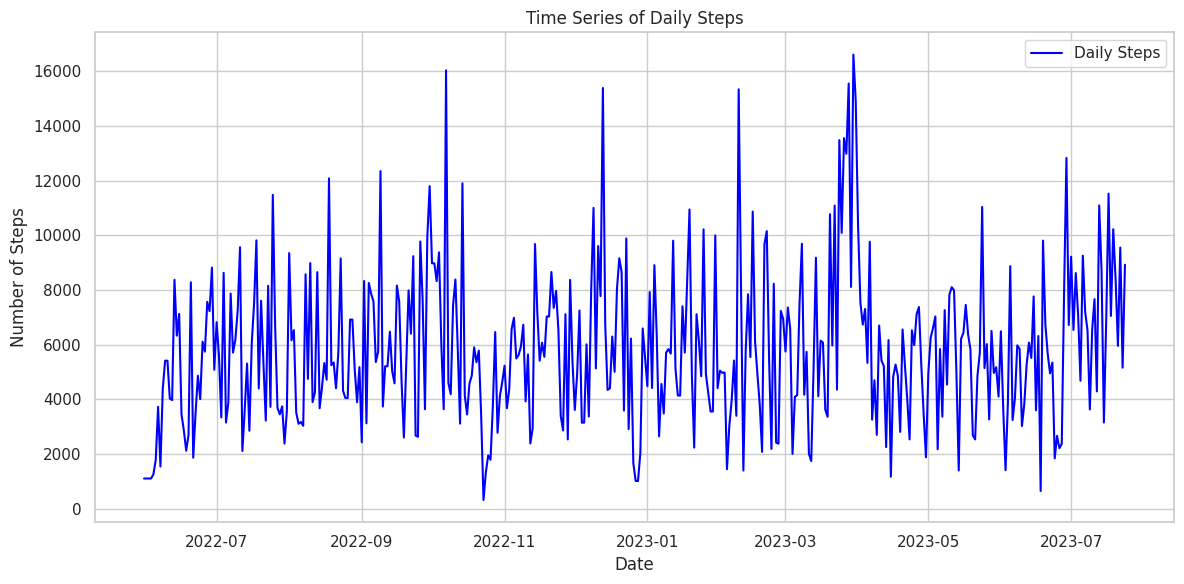

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# Ensure 'Actual' column exists and 'Date' is the index
if 'Actual' in combined_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_data.index, combined_data['Actual'], color='blue', label='Daily Steps', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('Number of Steps')
    plt.title('Time Series of Daily Steps')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Actual' does not exist in the DataFrame.")


Descriptive Statistics:

In [58]:
import pandas as pd

descriptive_stats = combined_data.describe()
print(descriptive_stats)



             Actual         Goal
count    420.000000   420.000000
mean    5799.726190  7682.142857
std     2801.384844   613.717635
min      316.000000  6500.000000
25%     3731.250000  8000.000000
50%     5417.500000  8000.000000
75%     7362.250000  8000.000000
max    16611.000000  8000.000000


Comparing Actual Steps with Goals:

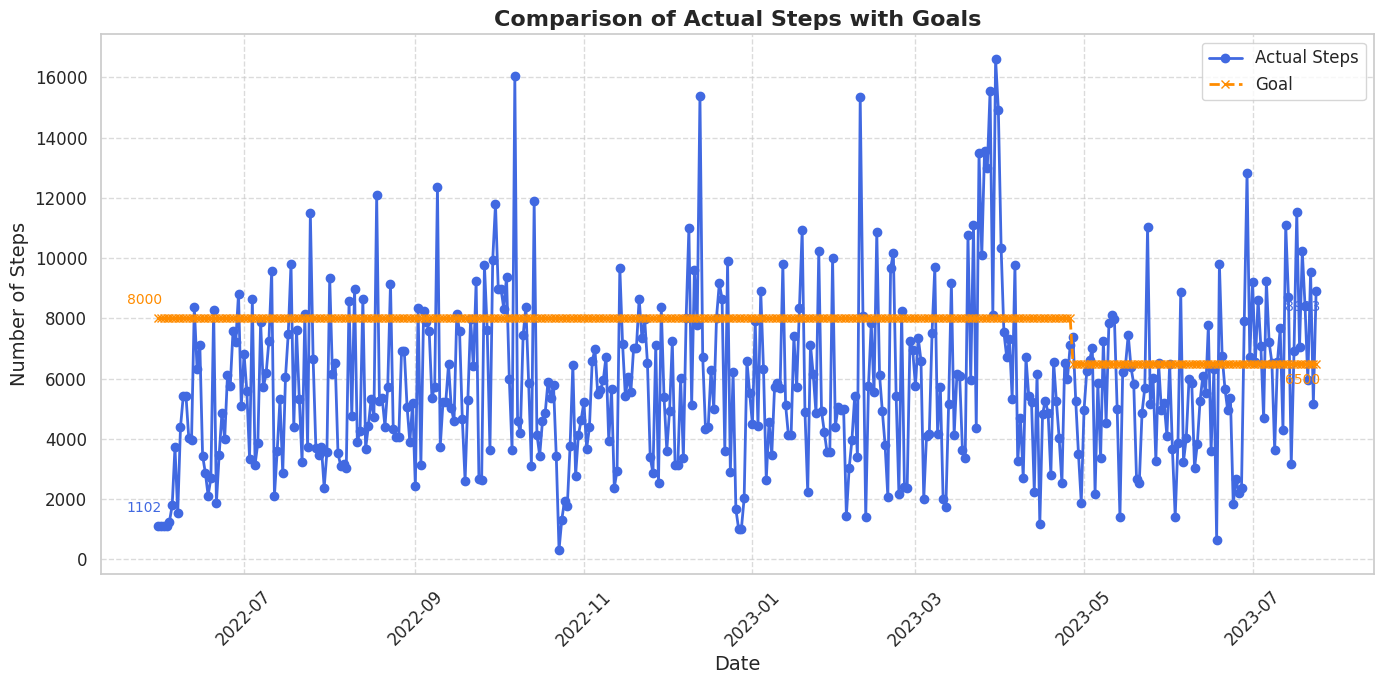

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Actual'], marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=6, label='Actual Steps')
plt.plot(combined_data.index, combined_data['Goal'], marker='x', linestyle='--', color='darkorange', linewidth=2, markersize=6, label='Goal')

plt.title('Comparison of Actual Steps with Goals', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Steps', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12, loc='best')

plt.annotate(f'{combined_data["Actual"].iloc[0]:.0f}',
             (combined_data.index[0], combined_data['Actual'].iloc[0]),
             textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10, color='royalblue')

plt.annotate(f'{combined_data["Goal"].iloc[0]:.0f}',
             (combined_data.index[0], combined_data['Goal'].iloc[0]),
             textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10, color='darkorange')

plt.annotate(f'{combined_data["Actual"].iloc[-1]:.0f}',
             (combined_data.index[-1], combined_data['Actual'].iloc[-1]),
             textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=10, color='royalblue')

plt.annotate(f'{combined_data["Goal"].iloc[-1]:.0f}',
             (combined_data.index[-1], combined_data['Goal'].iloc[-1]),
             textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=10, color='darkorange')
plt.tight_layout()

plt.show()


In [60]:
# Calculate the number of days where actual steps met or exceeded the goal
met_goal = combined_data['Actual'] >= combined_data['Goal']
percentage_met_goal = met_goal.mean() * 100

print(f"Percentage of days meeting or exceeding the goal: {percentage_met_goal:.2f}%")


Percentage of days meeting or exceeding the goal: 24.05%


Scatter Plot

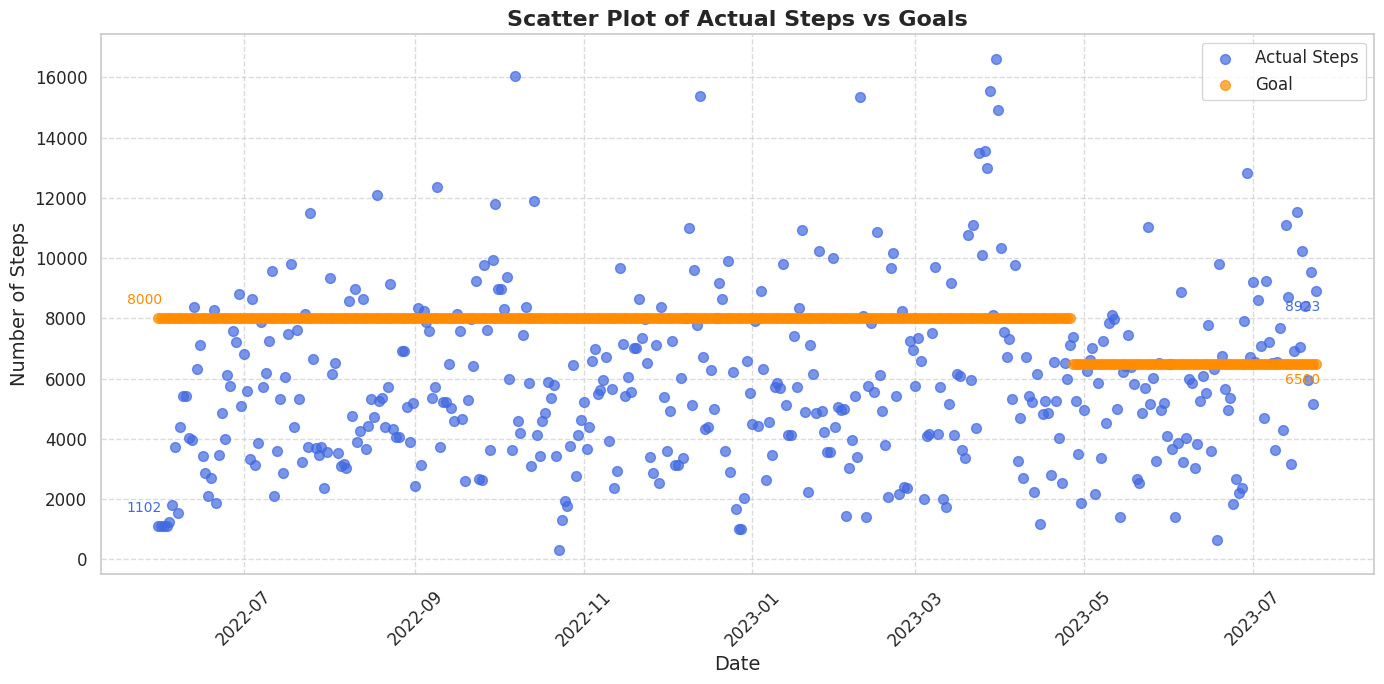

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.scatter(combined_data.index, combined_data['Actual'], color='royalblue', s=50, label='Actual Steps', alpha=0.7)

plt.scatter(combined_data.index, combined_data['Goal'], color='darkorange', s=50, label='Goal', alpha=0.7)

plt.title('Scatter Plot of Actual Steps vs Goals', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Steps', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(fontsize=12, loc='best')

plt.annotate(f'{combined_data["Actual"].iloc[0]:.0f}',
             (combined_data.index[0], combined_data['Actual'].iloc[0]),
             textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10, color='royalblue')

plt.annotate(f'{combined_data["Goal"].iloc[0]:.0f}',
             (combined_data.index[0], combined_data['Goal'].iloc[0]),
             textcoords="offset points", xytext=(-10,10), ha='center', fontsize=10, color='darkorange')


plt.annotate(f'{combined_data["Actual"].iloc[-1]:.0f}',
             (combined_data.index[-1], combined_data['Actual'].iloc[-1]),
             textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=10, color='royalblue')

plt.annotate(f'{combined_data["Goal"].iloc[-1]:.0f}',
             (combined_data.index[-1], combined_data['Goal'].iloc[-1]),
             textcoords="offset points", xytext=(-10,-15), ha='center', fontsize=10, color='darkorange')
plt.tight_layout()

plt.show()



Difference Distribution

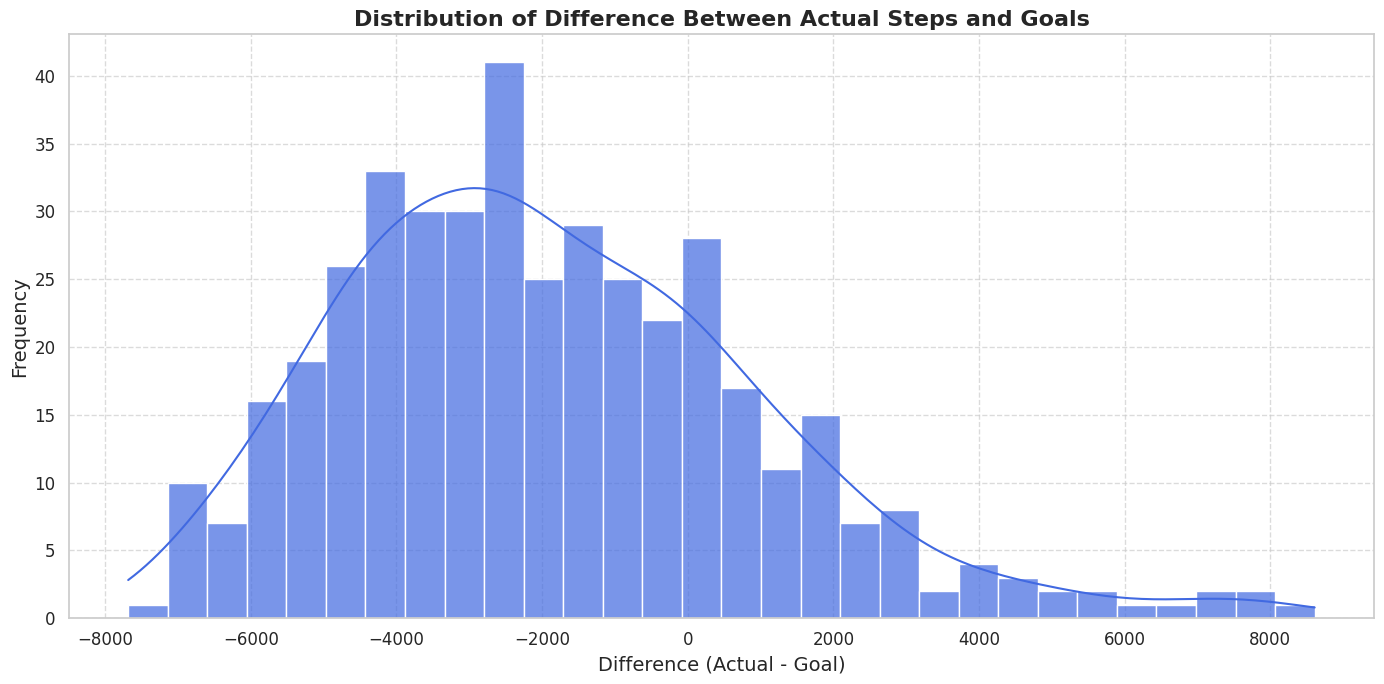

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the difference between Actual and Goal
combined_data['Difference'] = combined_data['Actual'] - combined_data['Goal']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

sns.histplot(combined_data['Difference'], kde=True, color='royalblue', bins=30, alpha=0.7)

plt.title('Distribution of Difference Between Actual Steps and Goals', fontsize=16, fontweight='bold')
plt.xlabel('Difference (Actual - Goal)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()



Seasonality and Stationarity Testing

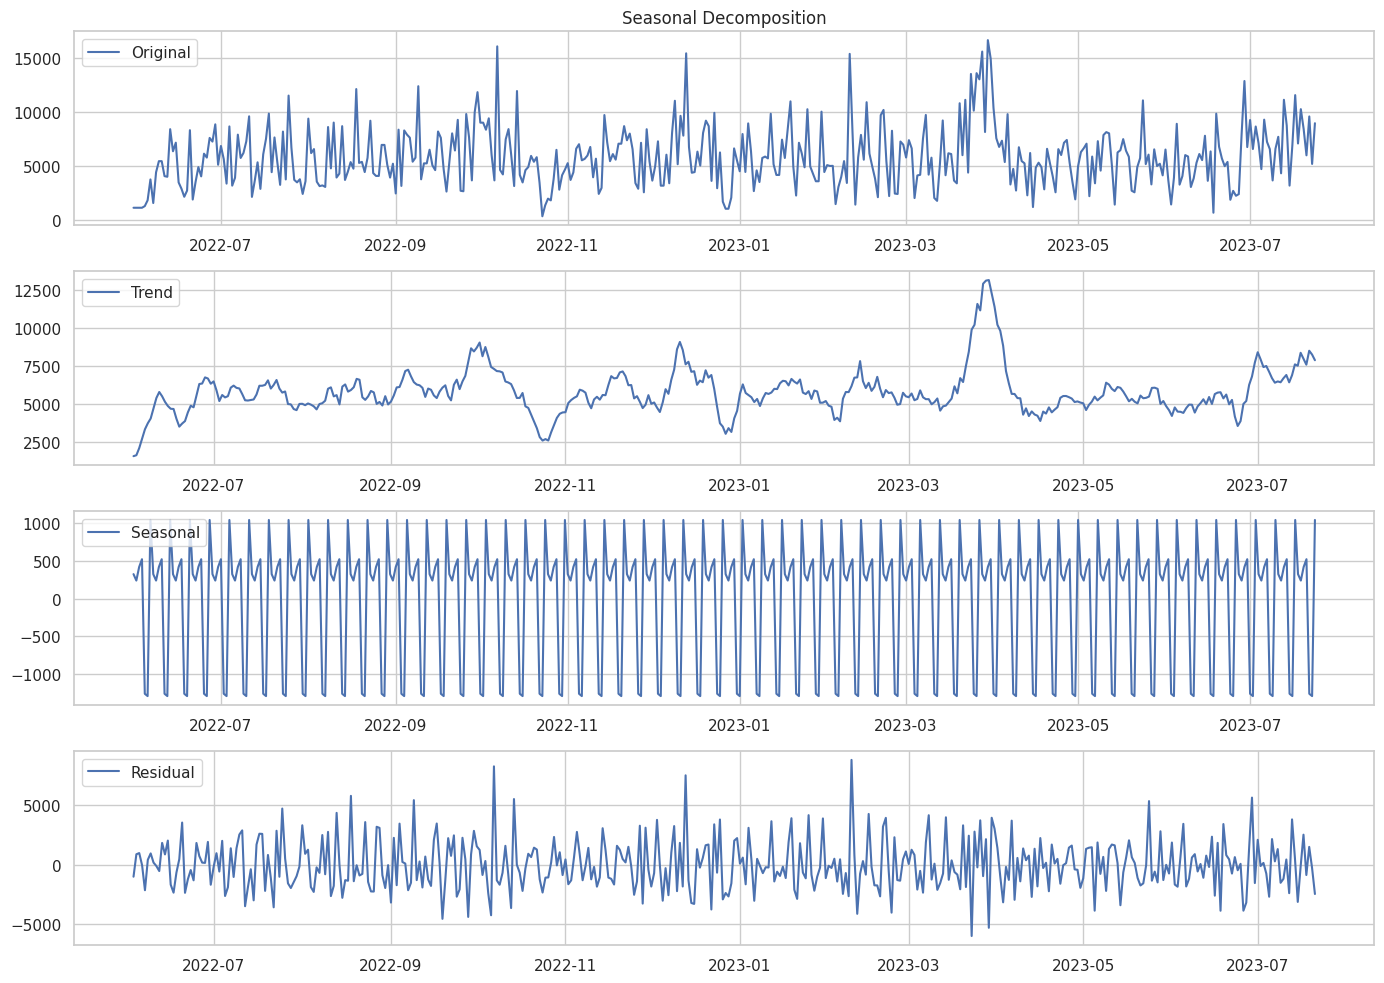

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(combined_data['Actual'], model='additive')

plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(combined_data['Actual'], label='Original')
plt.legend(loc='upper left')

plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


 Augmented Dickey-Fuller

In [35]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(combined_data['Actual'].dropna())

# Print the ADF test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])





ADF Statistic: -4.725665721788858
p-value: 7.529049756744404e-05
Critical Values: {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}


In [36]:
from statsmodels.tsa.stattools import kpss

# Perform the KPSS test
result = kpss(combined_data['Actual'].dropna(), regression='c')

# Print the KPSS test results
print('KPSS Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[3])


KPSS Statistic: 0.2432139807221686
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


<ipython-input-36-6499786ca2d0>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(combined_data['Actual'].dropna(), regression='c')


Compare time-series analysis model(s) : ARIMA , SARIMA and Exponential Smoothing

1. Exponential Smoothing

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(combined_data['Actual'].dropna(),
                             trend='add',
                             seasonal='add',
                             seasonal_periods=30)
model_fit = model.fit()

print(model_fit.summary())




                       ExponentialSmoothing Model Results                       
Dep. Variable:                   Actual   No. Observations:                  420
Model:             ExponentialSmoothing   SSE                     3423165289.266
Optimized:                         True   AIC                           6751.702
Trend:                         Additive   BIC                           6889.071
Seasonal:                      Additive   AICC                          6758.658
Seasonal Periods:                    30   Date:                 Tue, 13 Aug 2024
Box-Cox:                          False   Time:                         16:56:10
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1817857                alpha                 True
smoothing_trend          

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2. ARIMA : Estimating the model parameters

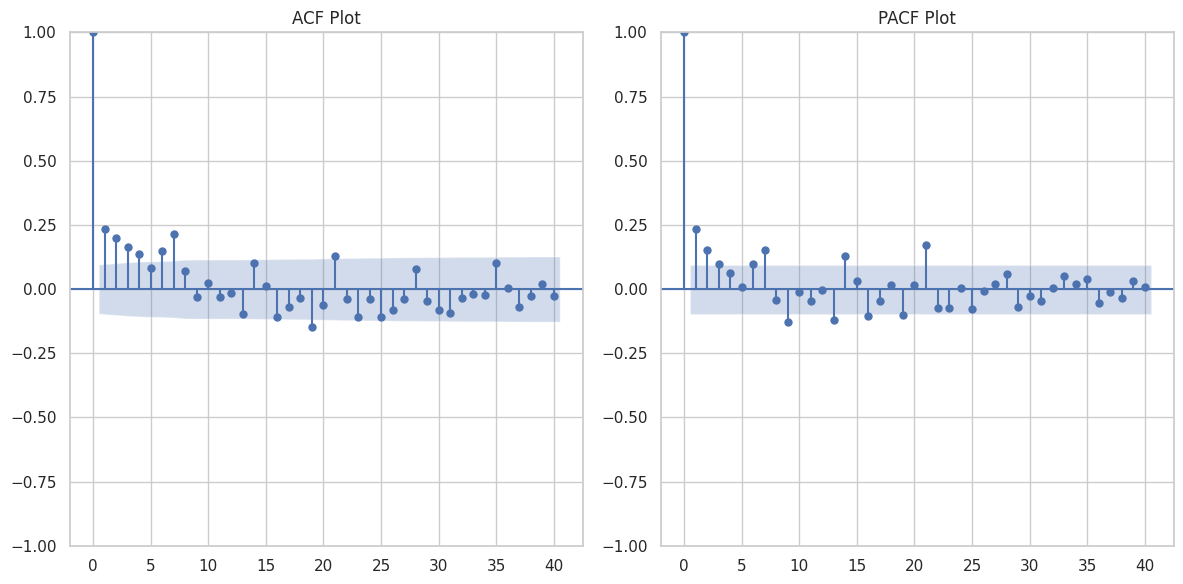

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = combined_data['Actual'].dropna()

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data, ax=plt.gca(), lags=40)
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(data, ax=plt.gca(), lags=40)
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [70]:
# Check for duplicate index labels
duplicates = combined_data.index[combined_data.index.duplicated()]
if not duplicates.empty:
    print(f"Duplicate index labels found: {duplicates}")
else:
    print("No duplicate index labels found.")


No duplicate index labels found.


In [71]:
# Reset index to make 'Date' a column again
combined_df_reset = combined_data.reset_index()

combined_df_reset = combined_df_reset.drop_duplicates(subset='Date')
combined_df_clean = combined_df_reset.set_index('Date')
print(combined_df_clean.head())


            Actual  Goal  Difference
Date                                
2022-05-31  1102.0  8000     -6898.0
2022-06-01  1102.0  8000     -6898.0
2022-06-02  1102.0  8000     -6898.0
2022-06-03  1102.0  8000     -6898.0
2022-06-04  1254.0  8000     -6746.0


In [72]:
# Perform differencing
combined_df_clean['Differenced'] = combined_df_clean['Actual'].diff().dropna()
print(combined_df_clean['Differenced'].head())


Date
2022-05-31      NaN
2022-06-01      0.0
2022-06-02      0.0
2022-06-03      0.0
2022-06-04    152.0
Name: Differenced, dtype: float64


In [74]:
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model with chosen parameters
p = 1
d = 1
q = 1
model = ARIMA(combined_data['Actual'].dropna(), order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3907.312
Date:                Tue, 13 Aug 2024   AIC                           7820.625
Time:                        17:00:27   BIC                           7832.738
Sample:                    05-31-2022   HQIC                          7825.413
                         - 07-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0589      0.057      1.041      0.298      -0.052       0.170
ma.L1         -0.8491      0.027    -31.084      0.000      -0.903      -0.796
sigma2      7.356e+06   4.59e+05     16.013      0.0

In [43]:
from statsmodels.tsa.arima.model import ARIMA


p = 1
d = 1
q = 1


model = ARIMA(combined_data['Actual'].dropna(), order=(p, d, q))
model_fit = model.fit()


print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Actual   No. Observations:                  420
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3907.312
Date:                Tue, 13 Aug 2024   AIC                           7820.625
Time:                        16:31:24   BIC                           7832.738
Sample:                    05-31-2022   HQIC                          7825.413
                         - 07-24-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0589      0.057      1.041      0.298      -0.052       0.170
ma.L1         -0.8491      0.027    -31.084      0.000      -0.903      -0.796
sigma2      7.356e+06   4.59e+05     16.013      0.0

3. SARIMA

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime


p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 30

model = SARIMAX(combined_data['Actual'].dropna(),
                 order=(p, d, q),
                 seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                             Actual   No. Observations:                  420
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3658.986
Date:                            Tue, 13 Aug 2024   AIC                           7327.973
Time:                                    17:02:45   BIC                           7347.791
Sample:                                05-31-2022   HQIC                          7335.830
                                     - 07-24-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0658      0.058      1.132      0.257      -0.048       0.180
ma.L1         -0.8388      0.028   

Forcasting: ARIMA , SARIMA and Exponential Smoothing

1. ARIMA Forcasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


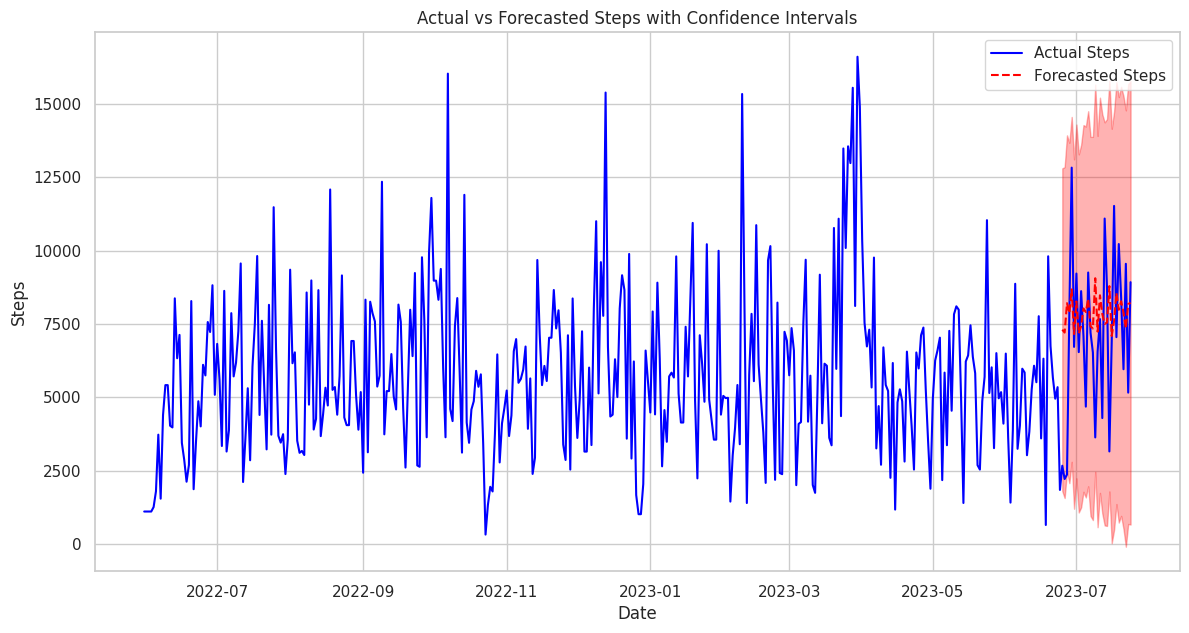

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime



# Define SARIMA parameters
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 30

# Fit the SARIMA model
model = SARIMAX(combined_data['Actual'].dropna(),
                 order=(p, d, q),
                 seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

# Forecasting from June 25, 2023
forecast_start = '2023-06-25'
forecast_periods = 30


forecast_dates = pd.date_range(start=forecast_start, periods=forecast_periods, freq='D')

# Forecasting
forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted': forecast_mean
}).set_index('Date')

# Plot actual vs forecasted
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Actual'], label='Actual Steps', color='blue')


plt.plot(forecast_df.index, forecast_df['Forecasted'], label='Forecasted Steps', color='red', linestyle='--')
plt.fill_between(forecast_df.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)

plt.title('Actual vs Forecasted Steps with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.grid(True)
plt.show()


2. Exponential Smoothing Forcasting

<ipython-input-79-e23716839696>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-79-e23716839696>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-79-e23716839696>:12: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-con

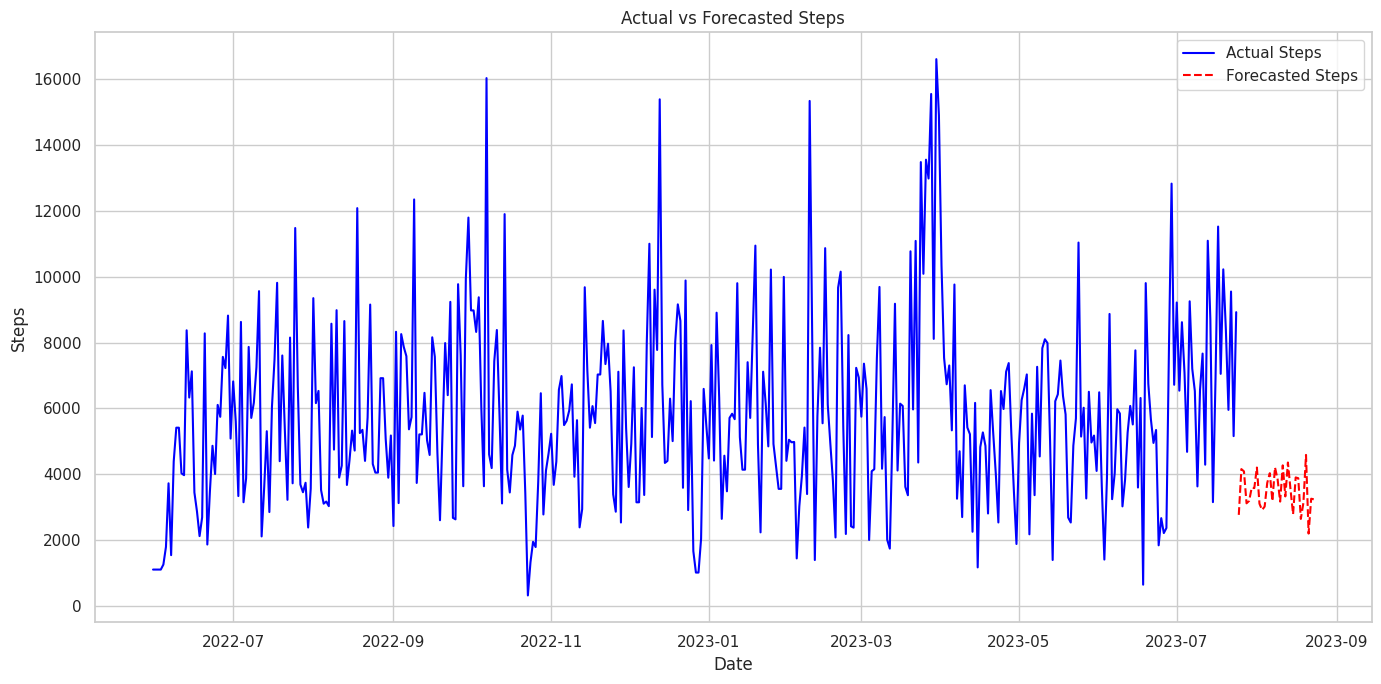

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

dataframes = []

for filename in filenames:
    file_url = base_url + filename
    df = pd.read_csv(file_url)

    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.set_index('Date', inplace=True)
combined_df.sort_index(inplace=True)

combined_df.replace(0, np.nan, inplace=True)
combined_df['Actual'].interpolate(method='linear', inplace=True)


model = ExponentialSmoothing(combined_df['Actual'].dropna(), trend='add', seasonal='add', seasonal_periods=30)
model_fit = model.fit()


forecast_periods = 30
forecast_start = combined_data.index.max() + pd.DateOffset(days=1)
forecast_dates = pd.date_range(start=forecast_start, periods=forecast_periods, freq='D')

# Forecasting
forecast = model_fit.forecast(steps=forecast_periods)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted': forecast
}).set_index('Date')

plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Actual'], label='Actual Steps', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted'], label='Forecasted Steps', color='red', linestyle='--')

plt.title('Actual vs Forecasted Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3. SARIMA Forcasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


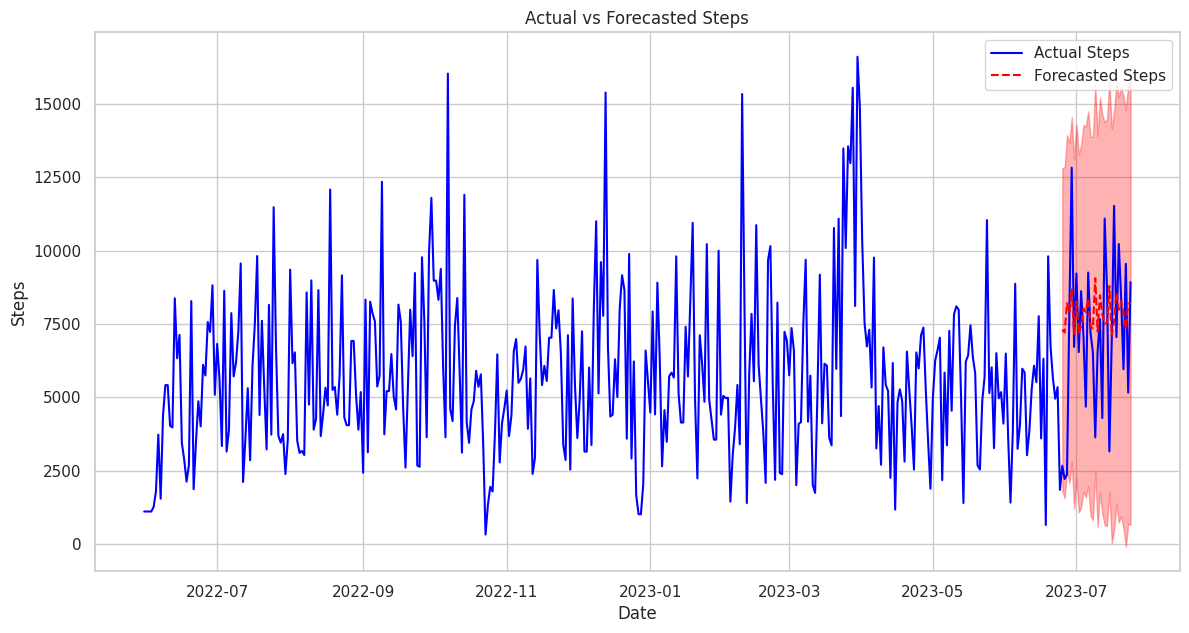

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime

p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 30

# Fit the SARIMA model
model = SARIMAX(combined_data['Actual'].dropna(),
                 order=(p, d, q),
                 seasonal_order=(P, D, Q, s))
model_fit = model.fit(disp=False)

# Forecasting from June 25, 2023
forecast_start = '2023-06-25'
forecast_periods = 30


forecast_dates = pd.date_range(start=forecast_start, periods=forecast_periods, freq='D')

forecast = model_fit.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecasted': forecast_mean
}).set_index('Date')

# Plot actual vs forecasted
plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Actual'], label='Actual Steps', color='blue')

plt.plot(forecast_df.index, forecast_df['Forecasted'], label='Forecasted Steps', color='red', linestyle='--')

plt.fill_between(forecast_df.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)

plt.title('Actual vs Forecasted Steps')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.grid(True)
plt.show()


Reflection

1. Data Preparation:

Loading and Cleaning: I started by integrating data from all the CSV files into a single DataFrame. This necessitated careful management of file paths and data consistency. To ensure continuity in the time series, missing values were filled with zeros first, followed by the next valid observation.

2. Exploratory Data Analysis:

Trend Visualization: Plotting the time series data allowed  me to see broad trends and identify any noticeable patterns or anomalies. It gave a graphic overview of daily steps in relation to goals, highlighting periods of high and low activity.

Descriptive Statistics: Calculating mean, median, and standard deviation yielded information on the distribution and variability of daily steps. This information is critical for determining the data's core tendency and distribution.

3. Testing for Seasonality and Stationarity:

Seasonal Decomposition: Breaking down the time series into trend, seasonal, and residual components enabled me to detect and visualize repeating patterns and seasonal impacts. This helped me comprehend the data's basic structure.
Stationarity Testing: I utilized the Augmented Dickey-Fuller test to assess if the time series was stationary. Non-stationary data frequently require differencing or transformation prior to modeling.

4. Model Selection:

Choosing a Model: Based on the data's features (trend, seasonality), i chose SARIMA (Seasonal ARIMA), which can handle both seasonal and non-seasonal components. The parameters for ARIMA (p, d, q) and seasonality (P, D, Q, s) were selected based on model diagnostics and performance.
Parameter Estimation: Fitting the SARIMA model to the data entailed estimating parameters that best described the data's behavior while accounting for known seasonality and trends.



Insights and Learnings:

Patterns and Trends: The time series analysis identified underlying patterns and trends in daily steps, indicating times of increased or reduced activity. Recognizing these patterns could assist in setting more realistic exercise goals and make changes to exercise routine.

Model Performance: The SARIMA model established a framework for forecasting that took into account both trend and seasonality. The model's performance indicators were useful in determining its predicted accuracy and suggesting areas for improvement.

Future Improvements:

Validation and Testing: Using cross-validation techniques and robustness tests to assess model reliability and validity over various time periods will help improve the forecasting process.

Expanded Analysis: Incorporating more data, such as contextual factors influencing physical activity (e.g., weather, special events), might give deeper insights and improve the forecasting model's robustness.